In [ ]:
# Visualize the results from a pde1bvp_coupled_pinn.py run.

In [6]:
from importlib import import_module
import math as m
import os
import numpy as np
import matplotlib.pyplot as plt
import sys

In [2]:
# Specify the run ID (aka problem name).
runid = "static"

# Add the subdirectory for the run results to the module search path.
run_path = os.path.join(".", runid)
sys.path.append(run_path)

# Import the problem definition from the run results directory.
p = import_module(runid)

# Read the run hyperparameters from the run results directory.
import hyperparameters as hp

In [ ]:
# Load the training points, trained values, and trained derivatives
# xt_train = np.loadtxt(os.path.join(runid, "x_train.dat"))
# y1_train = np.loadtxt(os.path.join(runid, "y1_train.dat"))
# dy1_dx_train = np.loadtxt(os.path.join(runid, "dy1_dx_train.dat"))
# y2_train = np.loadtxt(os.path.join(runid, "y2_train.dat"))
# dy2_dx_train = np.loadtxt(os.path.join(runid, "dy2_dx_train.dat"))

In [ ]:
# Load the validation points, validation values, and validation derivatives
# x_val = np.loadtxt(os.path.join(runid, "x_val.dat"))
# y1_val = np.loadtxt(os.path.join(runid, "y1_val.dat"))
# dy1_dx_val = np.loadtxt(os.path.join(runid, "dy1_dx_val.dat"))
# y2_val = np.loadtxt(os.path.join(runid, "y2_val.dat"))
# dy2_dx_val = np.loadtxt(os.path.join(runid, "dy2_dx_val.dat"))

In [3]:
# Load the loss function histories.
losses_model_in = np.loadtxt(os.path.join(runid, "losses_model_in.dat"))
losses_model_bc = np.loadtxt(os.path.join(runid, "losses_model_bc.dat"))
losses_model = np.loadtxt(os.path.join(runid, "losses_model.dat"))
losses_in = np.loadtxt(os.path.join(runid, "losses_in.dat"))
losses_bc = np.loadtxt(os.path.join(runid, "losses_bc.dat"))
losses = np.loadtxt(os.path.join(runid, "losses.dat"))


In [ ]:
# Format the x-axis labels.
# x_labels = ["%.1f" % x for x in x_train]

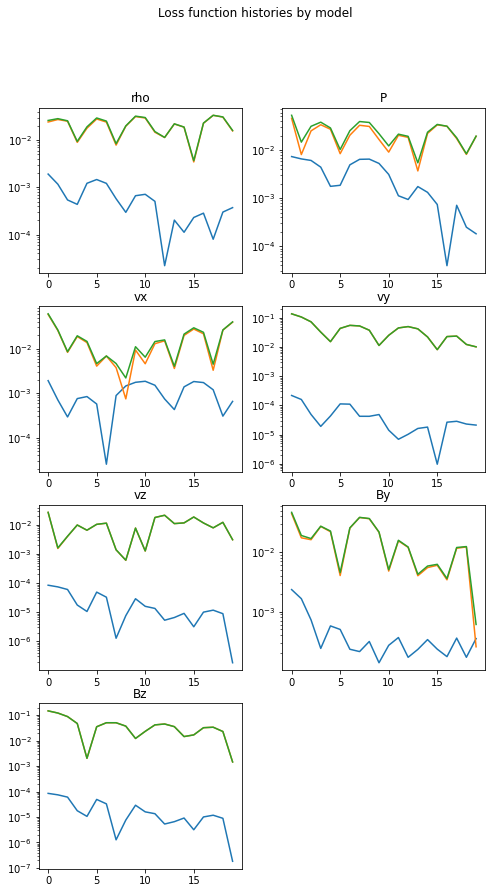

In [24]:
# Plot the loss function histories for the individual models.
n_models = len(p.variable_names)

# Compute the number of rows for the 2-per-row plot.
n_rows = m.ceil(n_models/2)

# Plot the loss history for each model.
plt.figure(figsize=(8, 14))
for i in range(n_models):
    plt.subplot(n_rows, 2, i + 1)
    variable_name = p.variable_names[i]
    plt.semilogy(losses_model_in[:, i], label="$L_{in,%s}$" % variable_name)
    plt.semilogy(losses_model_bc[:, i], label="$L_{bc,%s}$" % variable_name)
    plt.semilogy(losses_model[:, i], label="$L_{%s}$" % variable_name)
    plt.title(variable_name)
plt.suptitle("Loss function histories by model")
plt.show()

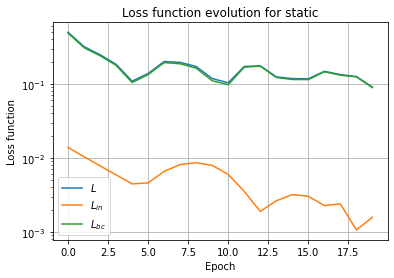

In [4]:
# Plot the loss function histories.
plt.semilogy(losses, label="$L$")
plt.semilogy(losses_in, label="$L_{in}$")
plt.semilogy(losses_bc, label="$L_{bc}$")
plt.xlabel("Epoch")
plt.ylabel("Loss function")
plt.legend()
plt.grid()
plt.title("Loss function evolution for %s" % runid)
plt.show()

In [ ]:
# Plot the trained y-values.
# plt.plot(x_train, y1_train, label="1")
# plt.plot(x_train, y2_train, label="2")
# plt.legend()
# plt.title("Trained y(x) for %s" % runid)
# plt.xlabel("x")
# plt.ylabel("y")
# plt.grid()
# plt.show()

In [ ]:
# Plot the trained dy/dx-values.
# plt.plot(x_train, dy1_dx_train, label="1")
# plt.plot(x_train, dy2_dx_train, label="2")
# plt.legend()
# plt.title("Trained dy/dx for %s" % runid)
# plt.xlabel("x")
# plt.ylabel("dy/dx")
# plt.grid()
# plt.show()

In [ ]:
# If the analytical solution is available, plot the error in the trained y-values.
# if p.analytical_solution_1 and p.analytical_solution_2:
#     y1_analytical = p.analytical_solution_1(x_train)
#     y2_analytical = p.analytical_solution_2(x_train)
#     y1_error = y1_train - y1_analytical
#     y2_error = y2_train - y2_analytical
#     rmse1 = np.sqrt(np.sum(y1_error**2)/len(y1_error))
#     rmse2 = np.sqrt(np.sum(y2_error**2)/len(y2_error))
#     plt.plot(x_train, y1_error, label="1")
#     plt.plot(x_train, y2_error, label="2")
#     plt.legend()
#     plt.title("Error in trained y(x) for %s" % runid)
#     plt.xlabel("x")
#     plt.ylabel("$y_t - y_a$")
#     plt.grid()
#     plt.show()
#     print("RMSE = (%s, %s)" % (rmse1, rmse2))

In [ ]:
# If the analytical solution is available, plot the error in the trained dy/dx-values.
# if p.analytical_derivative_1 and p.analytical_derivative_2:
#     dy1_dx_analytical = p.analytical_derivative_1(x_train)
#     dy2_dx_analytical = p.analytical_derivative_2(x_train)
#     dy1_dx_error = dy1_dx_train - dy1_dx_analytical
#     dy2_dx_error = dy2_dx_train - dy2_dx_analytical
#     rmse1 = np.sqrt(np.sum(dy1_dx_error**2)/len(dy1_dx_error))
#     rmse2 = np.sqrt(np.sum(dy2_dx_error**2)/len(dy2_dx_error))
#     plt.plot(x_train, dy1_dx_error, label="1")
#     plt.plot(x_train, dy2_dx_error, label="2")
#     plt.legend()
#     plt.title("Error in trained dy/dx for %s" % runid)
#     plt.xlabel("x")
#     plt.ylabel("$(dy/dx)_t - (dy/dx)_a$")
#     plt.grid()
#     plt.show()
#     print("RMSE = (%s, %s)" % (rmse1, rmse2))

In [ ]:
# Plot the validation y-values.
# plt.plot(x_val, y1_val, label="1")
# plt.plot(x_val, y2_val, label="2")
# plt.title("Validation y(x)")
# plt.xlabel("x")
# plt.ylabel("y")
# plt.grid()
# plt.show()

In [ ]:
# If solution available, plot the error in the validation y-values.
# if p.analytical_solution_1 is not None:
#     y1_analytical = p.analytical_solution_1(x_val)
#     y2_analytical = p.analytical_solution_2(x_val)
#     y1_error = y1_val - y1_analytical
#     y2_error = y2_val - y2_analytical
#     rmse1 = np.sqrt(np.sum(y1_error**2)/len(y1_error))
#     rmse2 = np.sqrt(np.sum(y2_error**2)/len(y2_error))
#     plt.plot(x_val, y1_error, label="1")
#     plt.plot(x_val, y2_error, label="2")
#     plt.title("Error in validation y(x)")
#     plt.xlabel("x")
#     plt.ylabel("$y_v - y_a$")
#     plt.grid()
#     plt.show()
#     print("RMSE = (%s, %s)" % (rmse1, rmse2))